<a href="https://colab.research.google.com/github/jafetimbre/verbose-projects/blob/master/infosec/mininet-dos-sim/analize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

![DoS attack simulation diagram](https://raw.githubusercontent.com/jafetimbre/verbose-projects/master/infosec/mininet-dos-sim/simulation_diagram.png "DoS attack simulation diagram")

For more information, check out the simulation code [here](https://github.com/jafetimbre/verbose-projects/blob/master/infosec/mininet-dos-sim/simulation.py)

We are analyzing the traffic after the ping request-reply phase (usual traffic + dos).

In [2]:
host_1 = pd.read_csv("https://raw.githubusercontent.com/jafetimbre/verbose-projects/master/infosec/mininet-dos-sim/data/h1-eth0.csv")
host_2 = pd.read_csv("https://raw.githubusercontent.com/jafetimbre/verbose-projects/master/infosec/mininet-dos-sim/data/h2-eth0.csv")
host_3 = pd.read_csv("https://raw.githubusercontent.com/jafetimbre/verbose-projects/master/infosec/mininet-dos-sim/data/h3-eth0.csv")

In [3]:
host_1.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.0.0.2,10.0.0.1,TCP,7306,"60410 > 5001 [PSH, ACK] Seq=1 Ack=1 Win=83 L..."
1,2,0.000040,10.0.0.1,10.0.0.2,TCP,66,5001 > 60410 [ACK] Seq=1 Ack=7241 Win=78 Len...
2,3,0.066453,10.0.0.2,10.0.0.1,TCP,10202,"60410 > 5001 [PSH, ACK] Seq=7241 Ack=1 Win=8..."
3,4,0.066478,10.0.0.1,10.0.0.2,TCP,66,5001 > 60410 [ACK] Seq=1 Ack=17377 Win=75 Le...
4,5,0.145256,10.0.0.2,10.0.0.1,TCP,4410,"60410 > 5001 [PSH, ACK] Seq=17377 Ack=1 Win=..."


In [4]:
# forming the indexes as datetime for further analysis
host_1 = host_1.set_index(pd.DatetimeIndex(pd.to_datetime(host_1["Time"], unit="s")))
host_2 = host_2.set_index(pd.DatetimeIndex(pd.to_datetime(host_2["Time"], unit="s")))
host_3 = host_3.set_index(pd.DatetimeIndex(pd.to_datetime(host_3["Time"], unit="s")))

In [5]:
# Computing packet frequency with 1s window
h1_pkt_freq = host_1.resample('1S').count()["Time"]
h2_pkt_freq = host_2.resample('1S').count()["Time"]

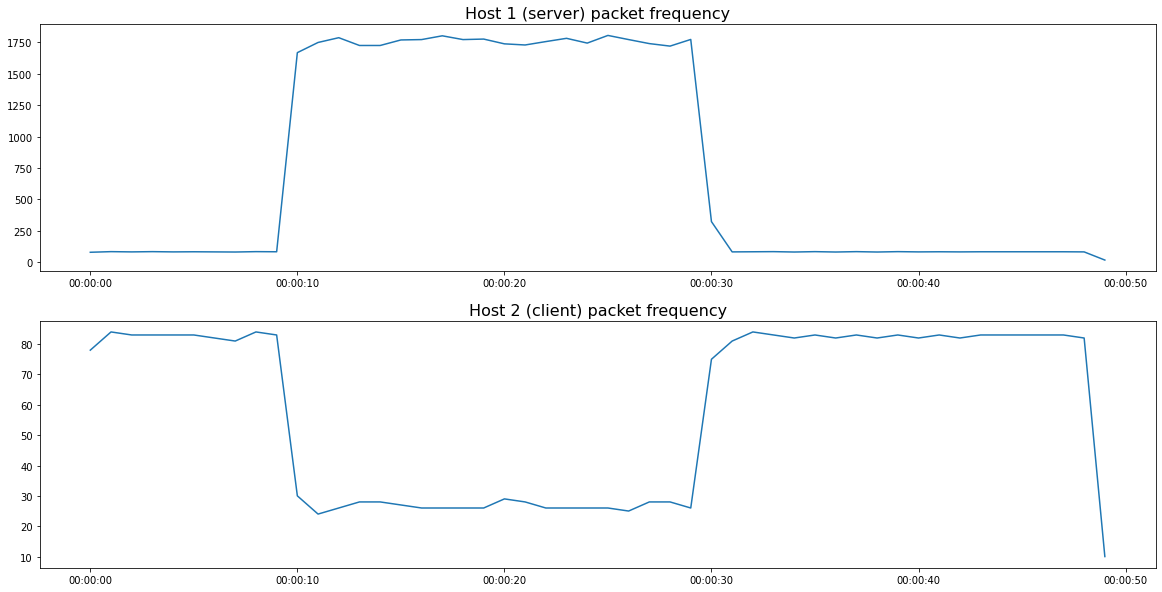

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))

ax[0].plot(h1_pkt_freq)
ax[0].set_title('Host 1 (server) packet frequency', size=16)

ax[1].plot(h2_pkt_freq)
ax[1].set_title('Host 2 (client) packet frequency', size=16)

plt.show()

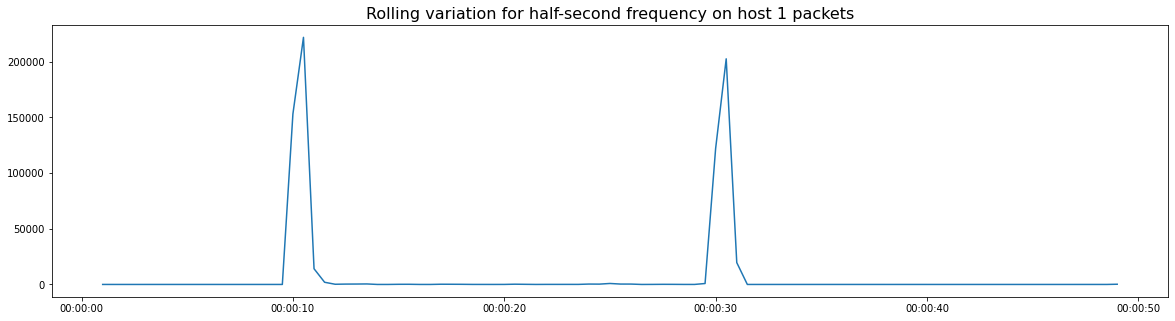

In [7]:
# rolling variation for half-second frequency on host 1
t = host_1['Time'].resample('500ms').count().rolling(3).var()

plt.figure(figsize=(20, 5))
plt.title('Rolling variation for half-second frequency on host 1 packets', size=16)
plt.plot(t)

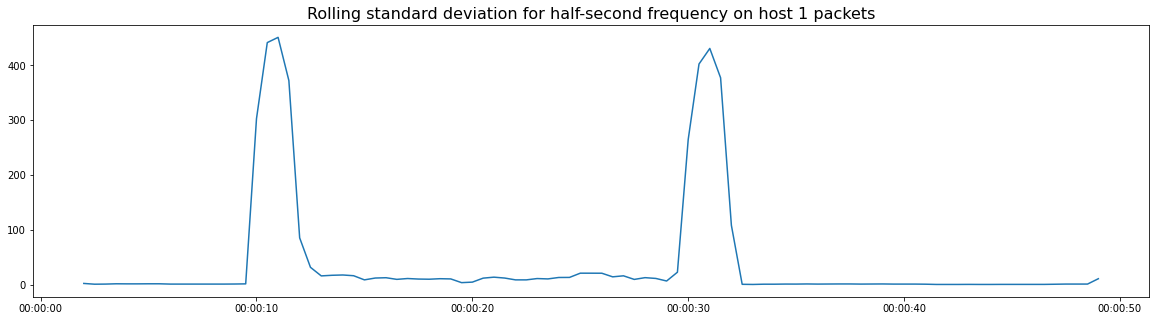

In [8]:
# rolling standard deviation for half-second frequency on host 1
t = host_1["Time"].resample('500ms').count().rolling(5).std()

plt.figure(figsize=(20, 5))
plt.title('Rolling standard deviation for half-second frequency on host 1 packets', size=16)
plt.plot(t)

In [9]:
h1_fil_h3 = host_1.loc[host_1['Source'] == '10.0.0.3']
h1_fil_h2 = host_1.loc[host_1['Source'] == '10.0.0.2']

t3 = h1_fil_h3["Time"].resample('1S').count().mean()
t2 = h1_fil_h2["Time"].resample('1S').count().mean()

print('Host 1 packet frequency filtered by host 3: %f' % (t3))
print('Host 1 packet frequency filtered by host 2: %f' % (t2))

print('Frequency absolute difference: %f' % (np.abs(t3 - t2)))

Host 1 packet frequency filtered by host 3: 829.047619
Host 1 packet frequency filtered by host 2: 31.180000
Frequency absolute difference: 797.867619


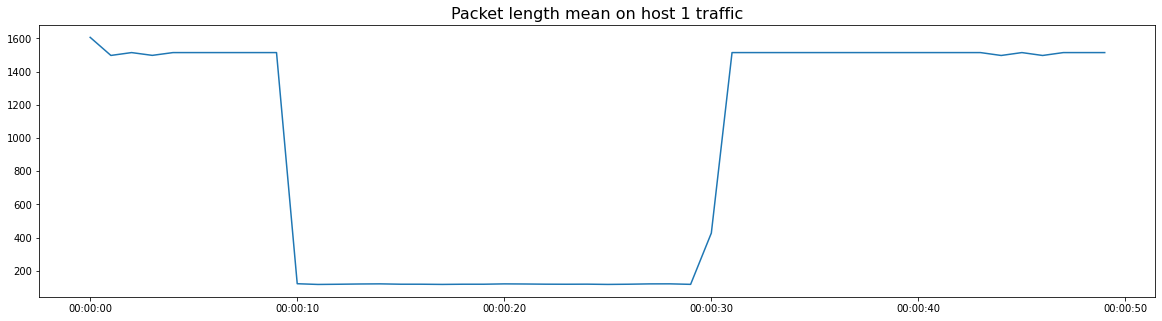

In [10]:
t = host_1['Length'].resample('1S').mean()

plt.figure(figsize=(20, 5))
plt.title('Packet length mean on host 1 traffic', size=16)
plt.plot(t)

In [11]:
h1_fil_h3['Length'].describe()

count    17410.0
mean        98.0
std          0.0
min         98.0
25%         98.0
50%         98.0
75%         98.0
max         98.0
Name: Length, dtype: float64

In [12]:
h1_fil_h2['Length'].describe()

count     1559.000000
mean      2789.243105
std        528.830940
min       1514.000000
25%       2962.000000
50%       2962.000000
75%       2962.000000
max      10202.000000
Name: Length, dtype: float64

In [13]:
host_2.head()

,No.,Time,Source,Destination,Protocol,Length,Info
Time,,,,,,,
1970-01-01 00:00:00.000000,1,0.000000,10.0.0.2,10.0.0.1,TCP,7306,"60410 > 5001 [PSH, ACK] Seq=1 Ack=1 Win=83 L..."
1970-01-01 00:00:00.000604,2,0.000604,10.0.0.1,10.0.0.2,TCP,66,5001 > 60410 [ACK] Seq=1 Ack=7241 Win=78 Len...
1970-01-01 00:00:00.066427,3,0.066427,10.0.0.2,10.0.0.1,TCP,10202,"60410 > 5001 [PSH, ACK] Seq=7241 Ack=1 Win=8..."
1970-01-01 00:00:00.066585,4,0.066585,10.0.0.1,10.0.0.2,TCP,66,5001 > 60410 [ACK] Seq=1 Ack=17377 Win=75 Le...
1970-01-01 00:00:00.145261,5,0.145261,10.0.0.2,10.0.0.1,TCP,4410,"60410 > 5001 [PSH, ACK] Seq=17377 Ack=1 Win=..."


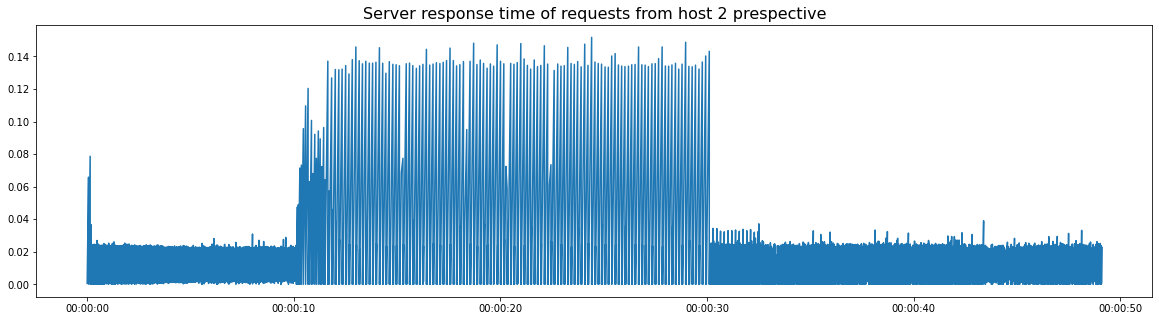

In [14]:
h2_t_diff = host_2['Time'].diff()

plt.figure(figsize=(20, 5))
plt.title('Server response time of requests from host 2 prespective', size=16)
plt.plot(h2_t_diff)